# Explore here

In [106]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

In [107]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [108]:
df.to_csv("../data/raw/total_data.csv", index = False)


    age. Edad del cliente (numérico)
    job. Tipo de trabajo (categórico)
    marital. Estado civil (categórico)
    education. Nivel de educación (categórico)
    default. ¿Tiene crédito actualmente? (categórico)
    housing. ¿Tiene un préstamo de vivienda? (categórico)
    loan. ¿Tiene un préstamo personal? (categórico)
    contact. Tipo de comunicación de contacto (categórico)
    month. Último mes en el que se le ha contactado (categórico)
    day_of_week. Último día en el que se le ha contactado (categórico)
    duration. Duración del contacto previo en segundos (numérico)
    campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
    pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
    previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
    poutcome. Resultado de la campaña de marketing anterior (categórico)
    emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
    cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
    cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
    euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
    nr.employed. Número de empleados. Indicador trimestral (numérico)
    y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No busco duplicados porque no hay datos que deban ser unicos, tal como identificadores.

Procedo a analizar variables categoricas

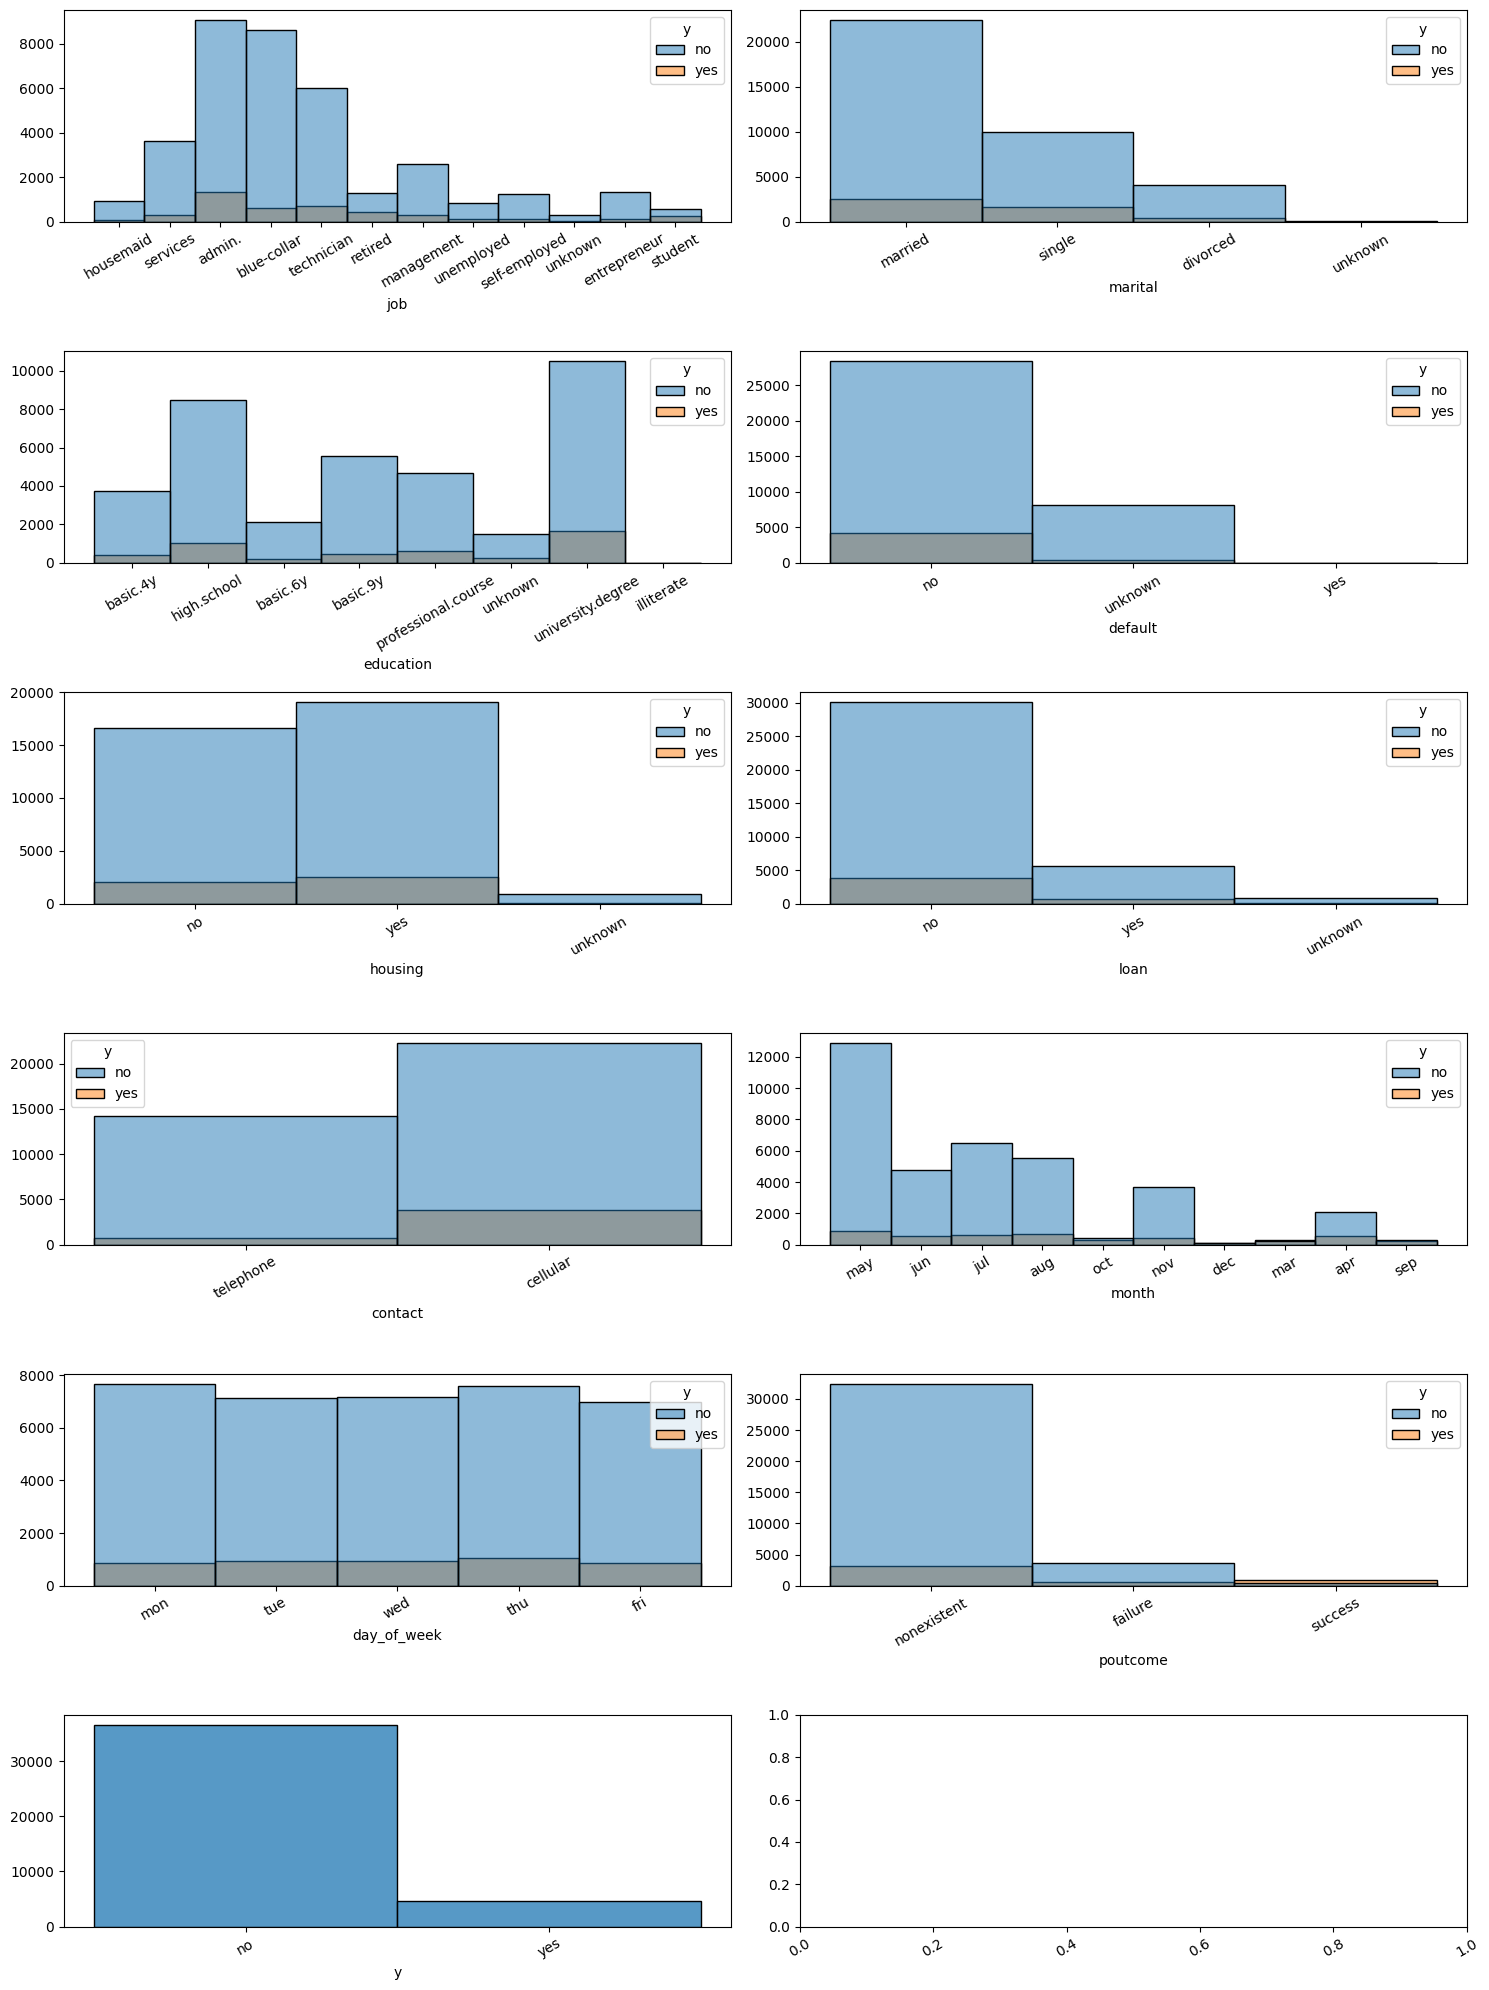

In [110]:

fig, axis = plt.subplots(6, 2, figsize = (15, 20))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "job", hue='y').set(ylabel=None)
sns.histplot(ax = axis[0, 1], data = df, x = "marital",hue='y').set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "education",hue='y').set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "default",hue='y').set(ylabel=None)
sns.histplot(ax = axis[2, 0], data = df, x = "housing",hue='y').set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "loan",hue='y').set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = df, x = "contact",hue='y').set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = df, x = "month",hue='y').set(ylabel = None)
sns.histplot(ax=axis[4,0], data = df, x = "day_of_week",hue='y').set(ylabel = None)
sns.histplot(ax=axis[4,1], data = df, x = "poutcome",hue='y').set(ylabel = None)
sns.histplot(ax=axis[5,0], data = df, x = "y").set(ylabel = None)


for ax in axis.flatten():
    ax.tick_params(axis='x', labelrotation=30)
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot

plt.show()

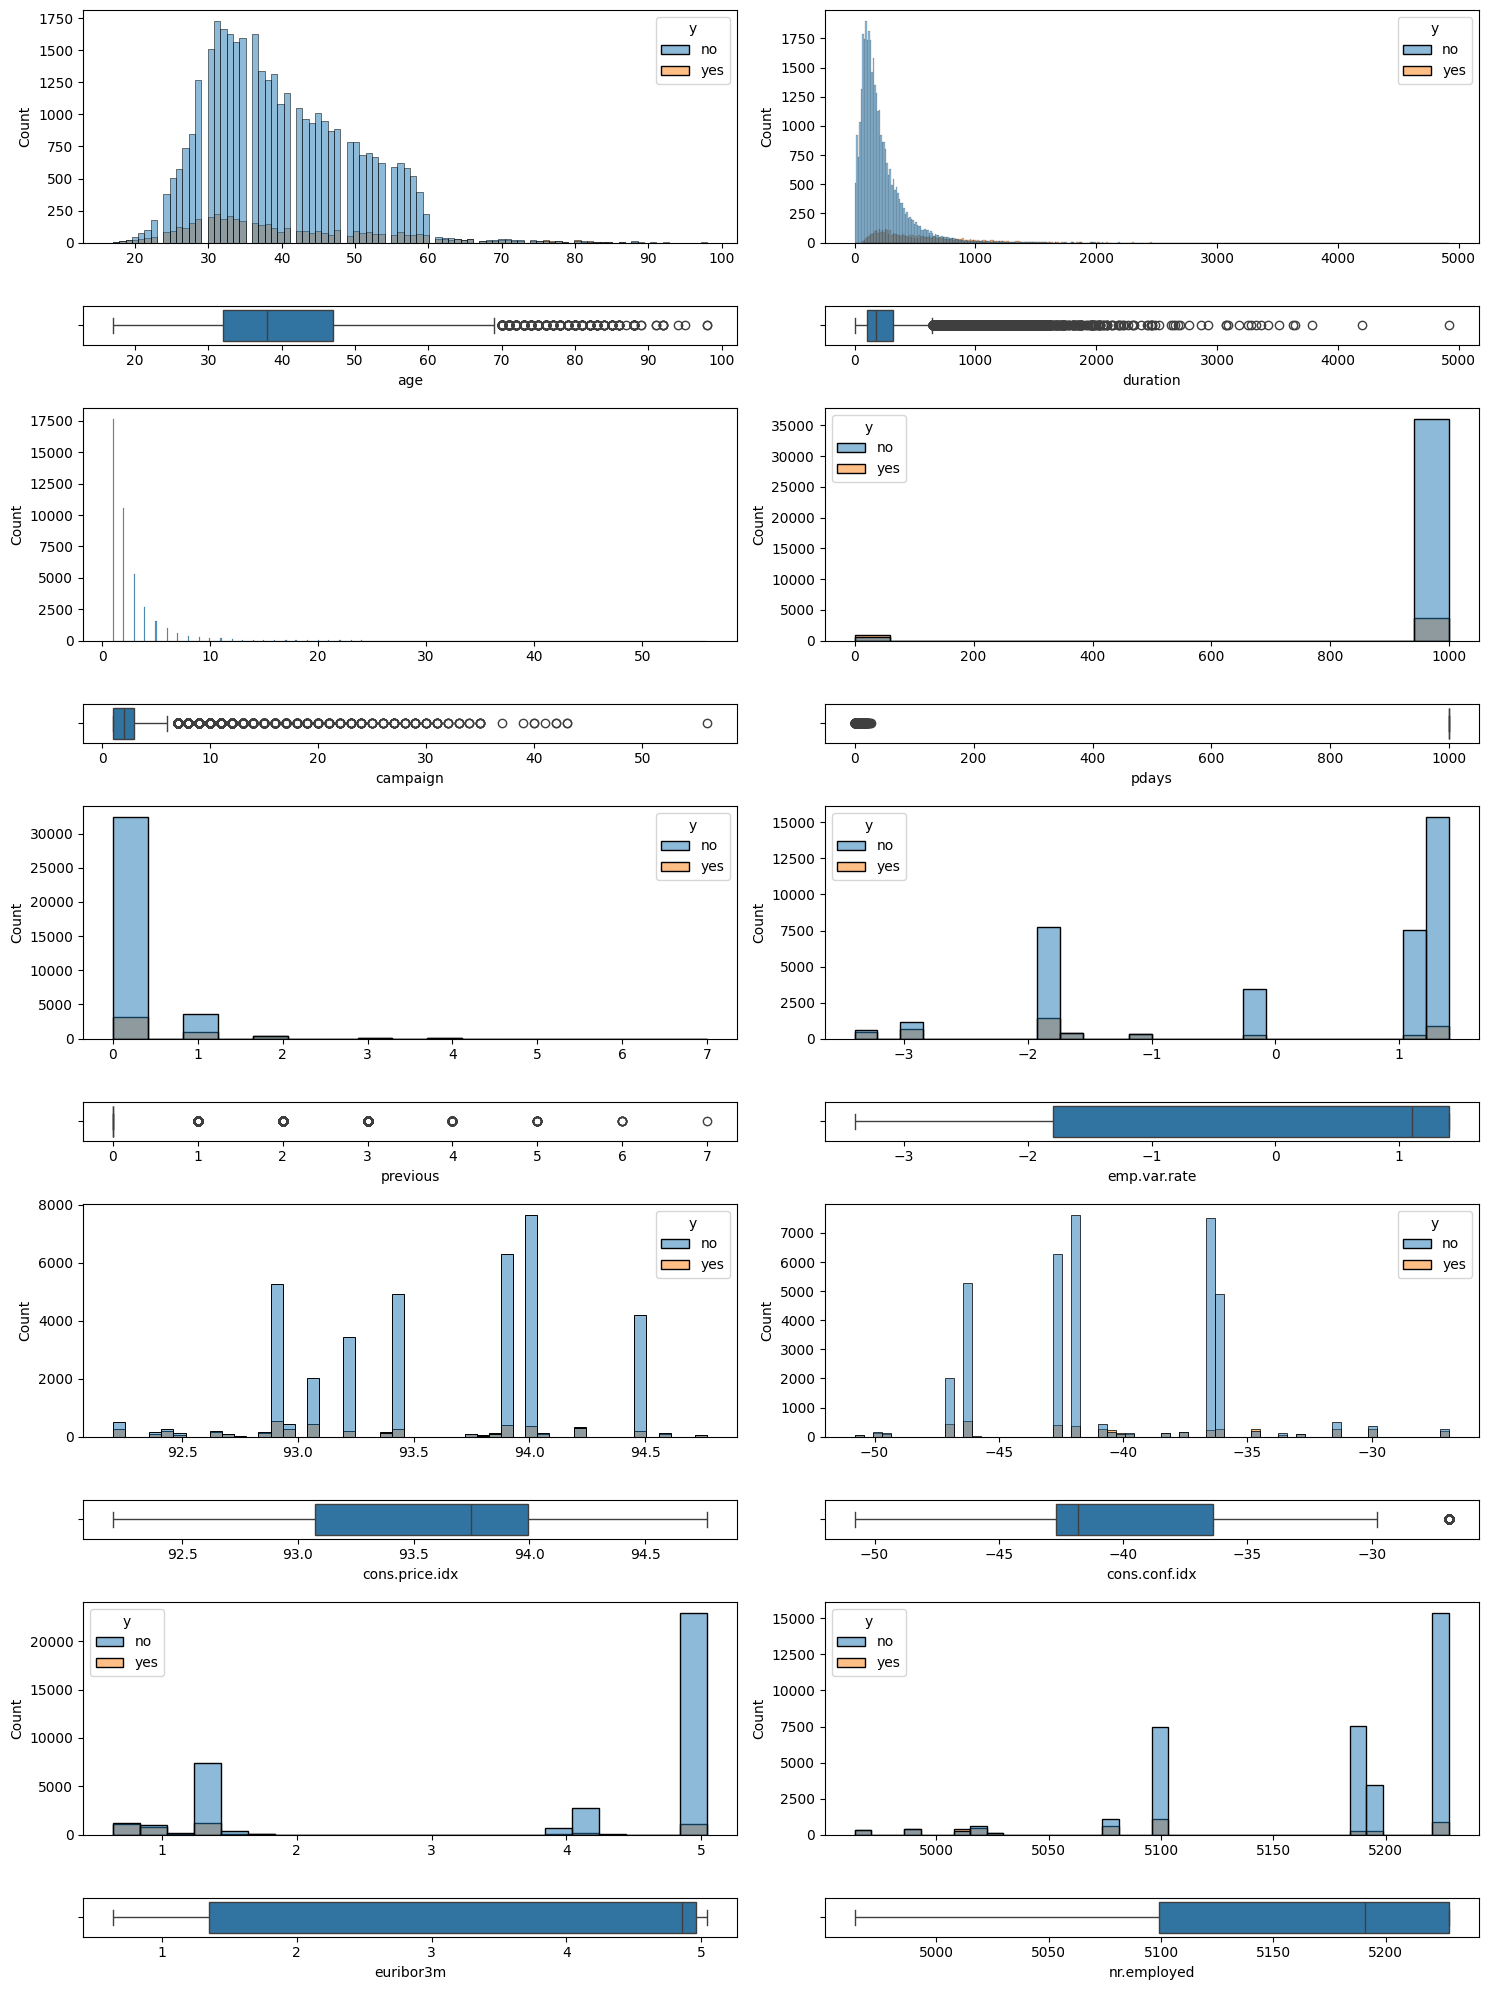

In [111]:
fig, axis = plt.subplots(10, 2, figsize = (15, 20), gridspec_kw = {"height_ratios": [6, 1, 6, 1,6,1,6,1,6,1]})

# Crear una figura múltiple con histogramas y diagramas de caja para variables numericas
sns.histplot(ax=axis[0,0], data= df, x= "age", hue="y").set(xlabel = None)
sns.boxplot(ax=axis[1,0], data= df, x= "age")
sns.histplot(ax=axis[0,1], data= df, x='duration',hue="y").set(xlabel=None)
sns.boxplot(ax=axis[1,1], data= df, x='duration')
sns.histplot(ax=axis[2,0], data= df, x='campaign').set(xlabel= None)
sns.boxplot(ax=axis[3,0], data= df, x="campaign")
sns.histplot(ax=axis[2,1], data=df, x="pdays",hue="y").set(xlabel=None)
sns.boxplot(ax=axis[3,1], data=df, x="pdays")
sns.histplot(ax=axis[4,0], data=df, x="previous",hue="y").set(xlabel=None)
sns.boxplot(ax=axis[5,0], data=df, x="previous")
sns.histplot(ax=axis[4,1], data=df, x="emp.var.rate",hue="y").set(xlabel=None)
sns.boxplot(ax=axis[5,1], data=df, x="emp.var.rate")
sns.histplot(ax=axis[6,0], data=df, x="cons.price.idx",hue="y").set(xlabel=None)
sns.boxplot(ax=axis[7,0], data=df, x="cons.price.idx")
sns.histplot(ax=axis[6,1], data=df, x="cons.conf.idx",hue="y").set(xlabel=None)
sns.boxplot(ax=axis[7,1], data=df, x="cons.conf.idx")
sns.histplot(ax=axis[8,0], data=df, x="euribor3m",hue="y").set(xlabel=None)
sns.boxplot(ax=axis[9,0], data=df, x="euribor3m")
sns.histplot(ax=axis[8,1], data=df, x="nr.employed",hue="y").set(xlabel=None)
sns.boxplot(ax=axis[9,1], data=df, x="nr.employed")
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot

In [112]:
#Factorizamos las variables categoricas

df["y_num"] = pd.factorize(df["y"])[0]
df["job_num"] = pd.factorize(df["job"])[0]
df["marital_num"] = pd.factorize(df["marital"])[0]
df["education_num"] = pd.factorize(df["education"])[0]
df["default_num"] = pd.factorize(df["default"])[0]
df["housing_num"] = pd.factorize(df["housing"])[0]
df["loan_num"] = pd.factorize(df["loan"])[0]
df["contact_num"] = pd.factorize(df["contact"])[0]
df["month_num"] = pd.factorize(df["month"])[0]
df["day_of_week_num"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_num"] = pd.factorize(df["poutcome"])[0]



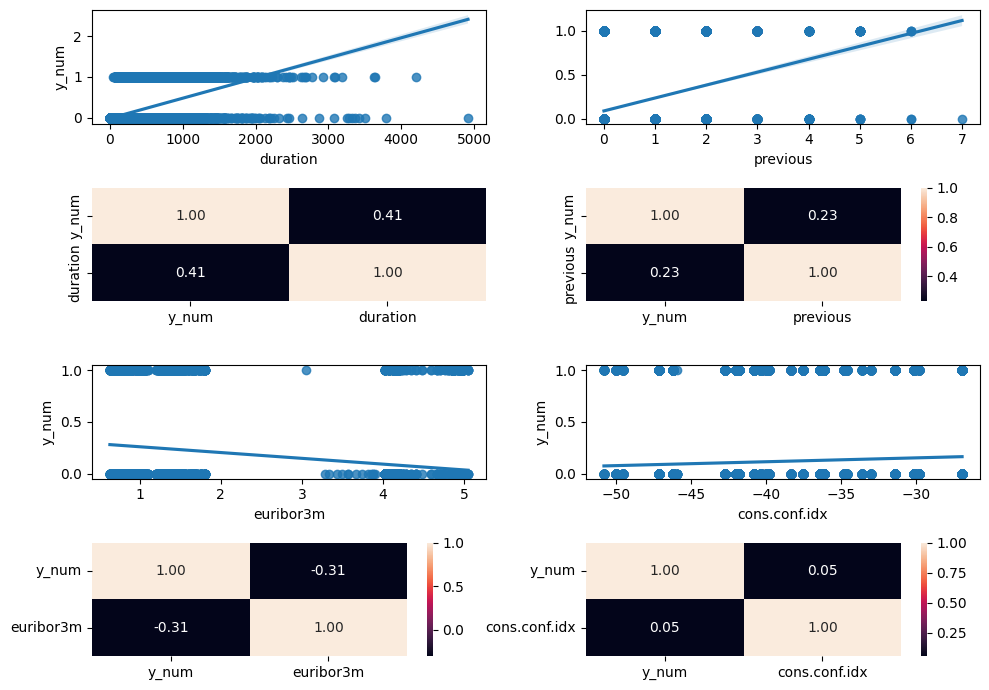

In [113]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "duration", y = "y_num")
sns.heatmap(df[["y_num", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "previous", y = "y_num").set(ylabel=None)
sns.heatmap(df[["y_num", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = df, x = "euribor3m", y = "y_num")
sns.heatmap(df[["y_num", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])
sns.regplot(ax = axis[2, 1], data = df, x = "cons.conf.idx", y = "y_num")
sns.heatmap(df[["y_num", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

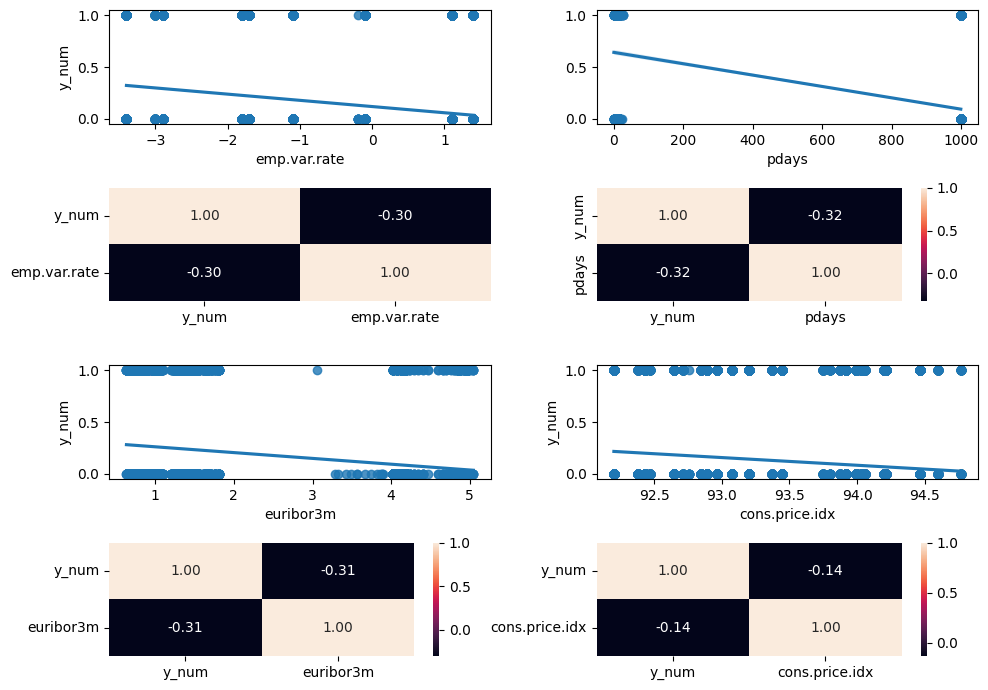

In [114]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "emp.var.rate", y = "y_num")
sns.heatmap(df[["y_num", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "pdays", y = "y_num").set(ylabel=None)
sns.heatmap(df[["y_num", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = df, x = "euribor3m", y = "y_num")
sns.heatmap(df[["y_num", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])
sns.regplot(ax = axis[2, 1], data = df, x = "cons.price.idx", y = "y_num")
sns.heatmap(df[["y_num", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

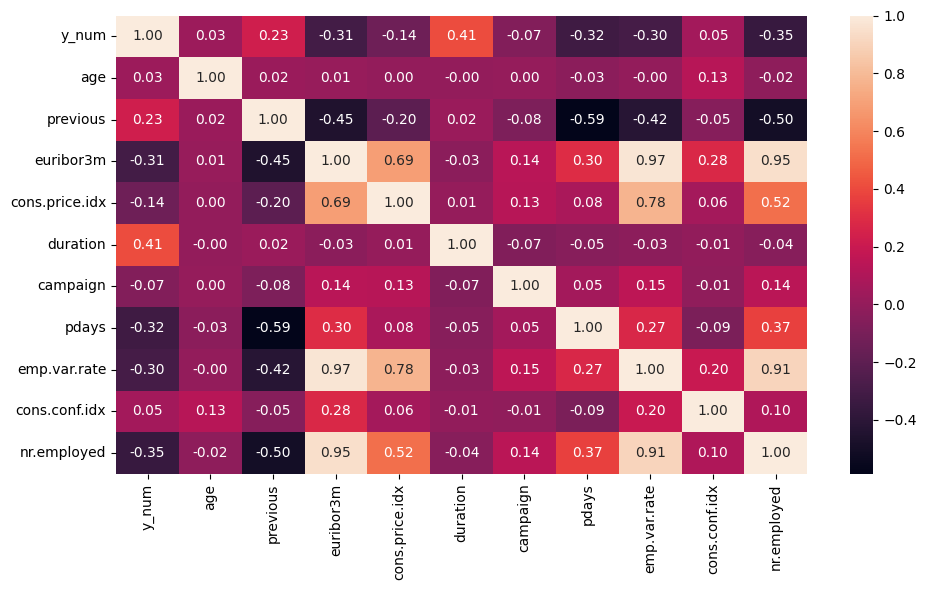

In [115]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["y_num", "age", "previous", "euribor3m", "cons.price.idx","duration","campaign", "pdays","emp.var.rate", "cons.conf.idx","nr.employed"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [116]:
#Hago drop de las columnas que tienen menor correlacion
df.drop(["campaign", "cons.conf.idx"], axis = 1, inplace = True)

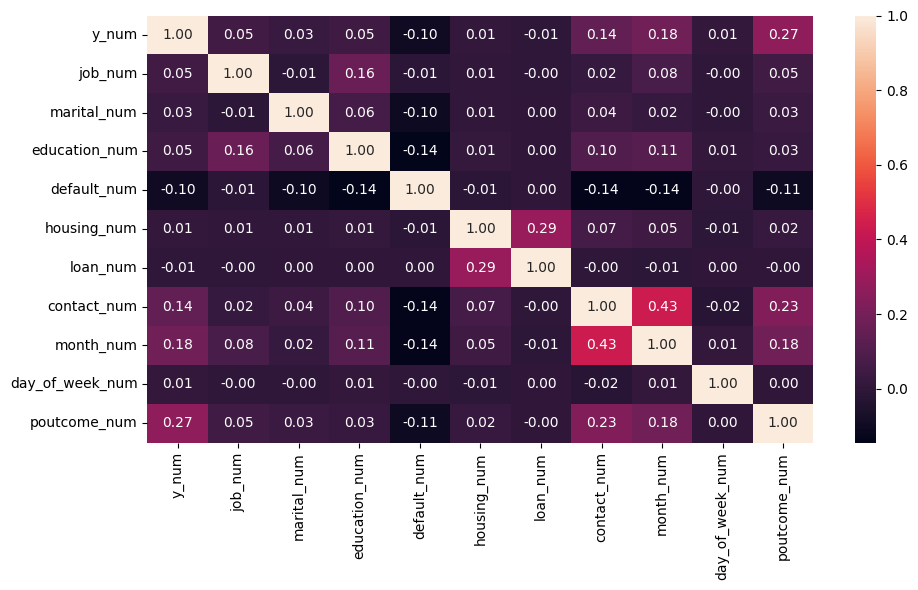

In [117]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["y_num", "job_num", "marital_num", "education_num", "default_num", "housing_num", "loan_num", "contact_num", "month_num", "day_of_week_num", "poutcome_num"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Las mayores correlaciones con respecto al target son:previous, euribor3m, cons.price.idx, duration, pdays, emp.var.rate, contact_num, month_num, poutcome_num


In [118]:
#Hago drop de las columnas que tienen menor correlacion
df.drop(["job_num", "marital_num", "education_num", "default_num", "housing_num", "loan_num",  "day_of_week_num"], axis = 1, inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y,y_num,contact_num,month_num,poutcome_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0


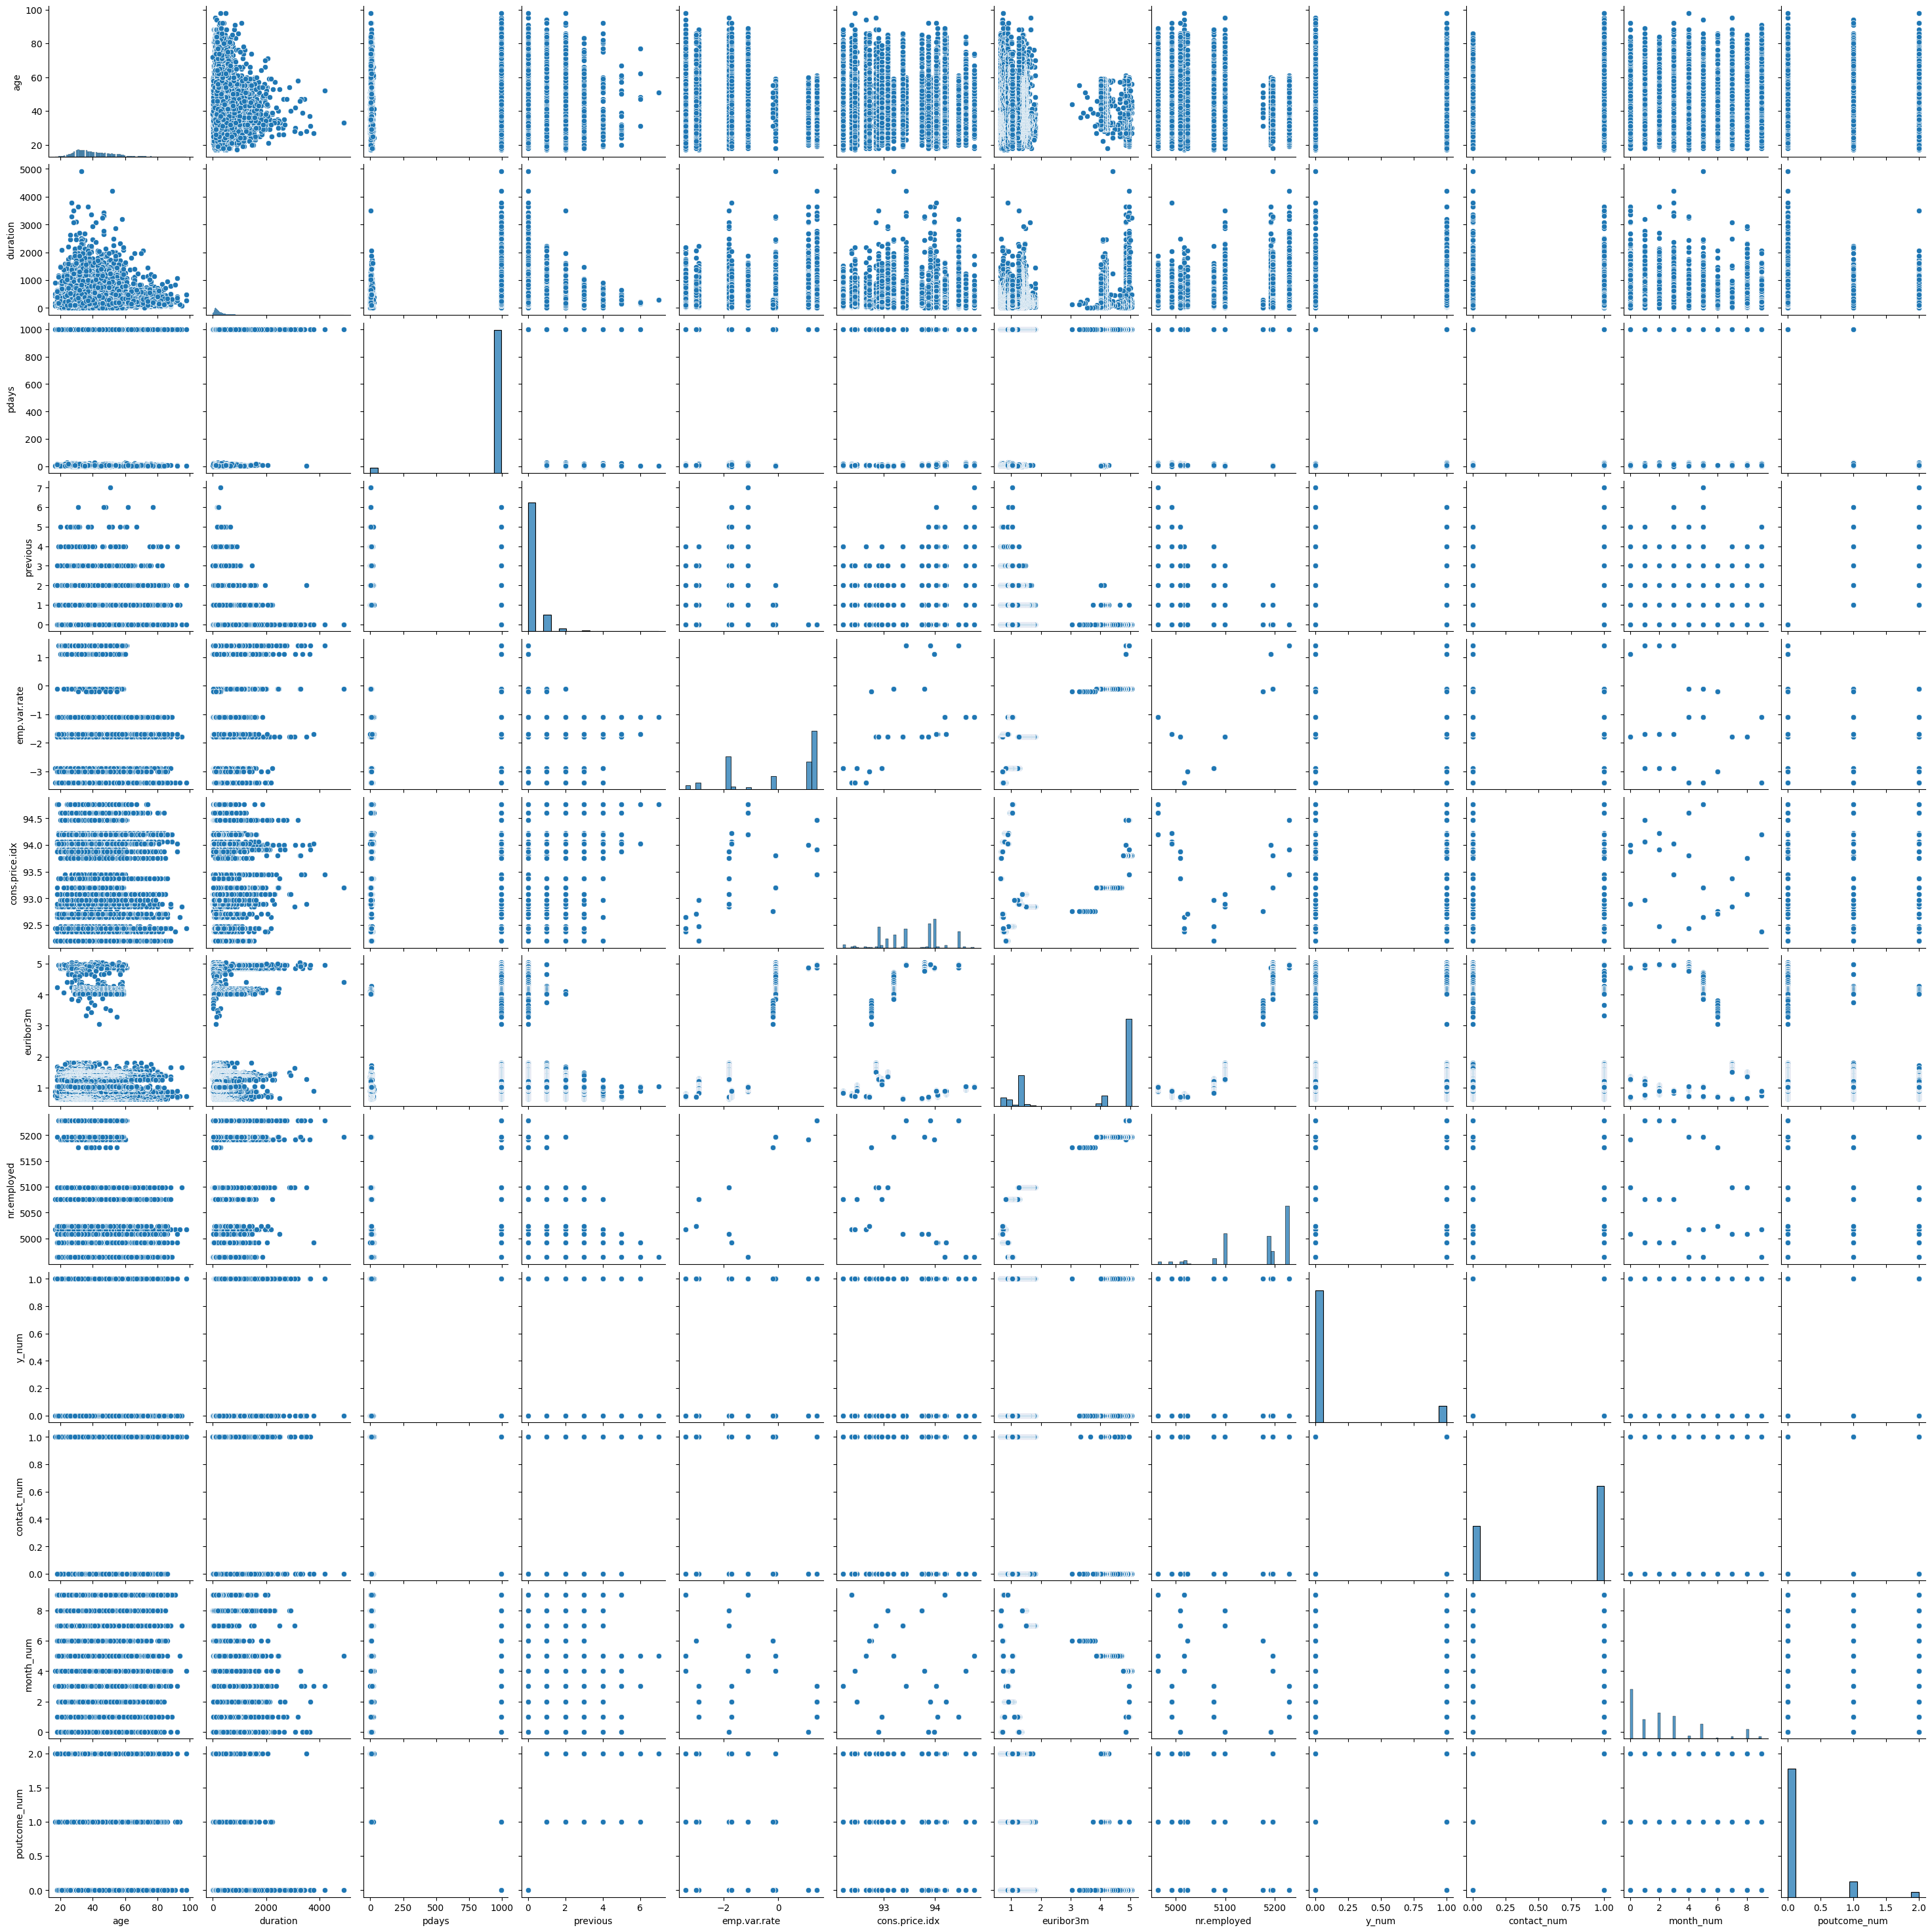

In [119]:
sns.pairplot(data = df)

In [120]:
df.describe()

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_num,contact_num,month_num,poutcome_num
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,962.475454,0.172963,0.081886,93.575664,3.621291,5167.035911,0.112654,0.634748,2.250097,0.169904
std,10.42125,259.279249,186.910907,0.494901,1.570960,0.578840,1.734447,72.251528,0.316173,0.481507,2.429079,0.455754
min,17.00000,0.000000,0.000000,0.000000,-3.400000,92.201000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,999.000000,0.000000,-1.800000,93.075000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,999.000000,0.000000,1.100000,93.749000,4.857000,5191.000000,0.000000,1.000000,2.000000,0.000000
75%,47.00000,319.000000,999.000000,0.000000,1.400000,93.994000,4.961000,5228.100000,0.000000,1.000000,3.000000,0.000000
max,98.00000,4918.000000,999.000000,7.000000,1.400000,94.767000,5.045000,5228.100000,1.000000,1.000000,9.000000,2.000000


In [121]:
age_stats = df["age"].describe()
age_stats

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [122]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [123]:
#filtro los outliers de age
df = df[(df["age"] >= 18) & (df["age"] <= 65)]
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y,y_num,contact_num,month_num,poutcome_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,4.857,5191.0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,1.028,4963.6,yes,1,1,5,0
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,success,-1.1,94.767,1.028,4963.6,no,0,1,5,2
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,1.028,4963.6,no,0,1,5,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,1.028,4963.6,no,0,1,5,0


In [124]:
datos_filtrados = ["age", "duration", "pdays", "previous", "emp.var.rate", "cons.price.idx", "contact_num", "month_num", "euribor3m", "nr.employed", "poutcome_num", "y_num"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[datos_filtrados])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = datos_filtrados)
df_scal.head()

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,contact_num,month_num,euribor3m,nr.employed,poutcome_num,y_num
0,0.808511,0.053070,1.0,0.0,0.9375,0.698753,0.0,0.0,0.957379,0.859735,0.0,0.0
1,0.829787,0.030297,1.0,0.0,0.9375,0.698753,0.0,0.0,0.957379,0.859735,0.0,0.0
2,0.404255,0.045954,1.0,0.0,0.9375,0.698753,0.0,0.0,0.957379,0.859735,0.0,0.0
3,0.468085,0.030704,1.0,0.0,0.9375,0.698753,0.0,0.0,0.957379,0.859735,0.0,0.0
4,0.808511,0.062424,1.0,0.0,0.9375,0.698753,0.0,0.0,0.957379,0.859735,0.0,0.0


In [125]:

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("y_num", axis = 1)
y = df_scal["y_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcome_num
0,0.0,1.000000,0.981410,1.000000,0.0
1,0.0,0.000000,0.024711,0.203781,0.0
2,0.0,0.937500,0.957379,0.859735,0.0
3,0.0,0.937500,0.956926,0.859735,0.0
4,0.0,0.333333,0.165722,0.512287,0.0


In [126]:
X_test_sel.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcome_num
0,0.285714,0.479167,0.055316,0.000000,1.0
1,0.000000,0.333333,0.160961,0.512287,0.0
2,0.142857,0.104167,0.089549,0.425709,0.5
3,0.000000,0.333333,0.148946,0.512287,0.0
4,0.000000,1.000000,0.981637,1.000000,0.0


In [127]:
X_train_sel["y_num"] = list(y_train)
X_test_sel["y_num"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [128]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcome_num,y_num
0,0.0,1.000000,0.981410,1.000000,0.0,0.0
1,0.0,0.000000,0.024711,0.203781,0.0,0.0
2,0.0,0.937500,0.957379,0.859735,0.0,0.0
3,0.0,0.937500,0.956926,0.859735,0.0,0.0
4,0.0,0.333333,0.165722,0.512287,0.0,1.0


In [129]:
X_train = train_data.drop(["y_num"], axis = 1)
y_train = train_data["y_num"]
X_test = test_data.drop(["y_num"], axis = 1)
y_test = test_data["y_num"]

In [130]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
y_pred = model.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [132]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8930244022676855

In [133]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [135]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [136]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [137]:
y_pred = model.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [138]:
accuracy_score(y_test, y_pred)

0.8959822528962288

El accuracy mejoro de 89,30% a 89,59%.

In [139]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))